# Session 2a - Inmas Workshop Machine Learning Workshop, January 13-14, 2024

Instructor: Christian Kuemmerle - kuemmerle@uncc.edu

## Classification of Fashion MNIST data

In this workshop we will explore classification on the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset containing 10 different types of clothing.

Let's begin by importing our common libraries as well as the datasets. Notice that we set the numpy seed to 0 for reproducibility. It's a good idea to set random seeds to specific values while you are experimenting.

In [1]:
import numpy as np;  np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt

import torchvision
import torch
import torchvision.transforms as transforms
train_set = torchvision.datasets.FashionMNIST(root="./", download=True, 
                                              train=True,
                                              transform=transforms.Compose([transforms.ToTensor()]))

test_set = torchvision.datasets.FashionMNIST(root="./", download=True, 
                                              train=False,
                                              transform=transforms.Compose([transforms.ToTensor()]))

We used [torchvision](https://pytorch.org/vision/stable/index.html), a part of the [PyTorch](https://pytorch.org) framework (we will come back to that later) to load the dataset in a way that seperates it already into training and test set. We highly recommend only looking at training data. In real life this is the data that you actually have, and in many cases the test data doesn't even exist yet. 

A huge problem in machine learning is leaking testing data into training data. You'll find that models are REALLY good at predicting data that they've already seen. In our case this leakage into the model is unlikely to happen since we were given preseparated data (though how well do you trust the person who gave you it?), but I assure you it definitely happens when you are separating data yourself. Even if you don't leak data directly into your models you can still have indirect leakage because any knowledge you have about the test data from taking a peek could influence how you design your models.

We HIGHLY recommend you scrutinize your data separation over and over again for any nontrivial data leaks in any project you undertake.

In [8]:
#select training data tensor and convert the type to a numpy array
X_train = train_set.data.numpy()
Y_train = train_set.targets.numpy()

In [ ]:
#do the same with the test data
X_test = 
Y_test = 

In the above cell, we converted the data already into our more familiar format of multidimensional [numpy](https://numpy.org/doc/stable/) arrays (numpy.ndarray).
Let's get a sense for the size and shape of our data; how many images are in the training set and what are their dimensions? <br> With the following commands, we obtain an overview of the size of the data:

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Let us have a glimpse at the some of the target variables. We observe that it consists of 10 different numbers, corresponding to 10 different class labels

In [9]:
Y_train[0:50]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3])

The class labels correspond to the following object classes, see [here](https://github.com/zalandoresearch/fashion-mnist#labels).

In [10]:
label_dict= {
0 : "tshirt",
1 : "pants",
2 : "sweater",
3 : "dress",
4 : "long sleeve",
5 : "sandal",
6 : "jacket",
7 : "sneaker",
8 : "bag",
9 : "shoe"}
data = list(label_dict.items())
label_array = np.array(data)[:,1]

The following visualizes some data samples. We first define a 'function' as we might re-use the code snippet further below.

In [11]:
def visualize_images(X,Y,label_dict,n_row=3,n_col=5,fsize=(12,10)):
    fig, axs = plt.subplots(n_row, n_col, figsize=fsize)

    for i, ax in zip(label_dict, axs.ravel()):
        
      # print the label and remove axis ticks
      # since these are images
        ax.set_title("{}: {}".format(i, label_dict[i]))
        ax.set_xticks([])
        ax.set_yticks([])

      # try to parse this. for each i we find a
      # random image in X_train which has label i
        if X.ndim == 2:
            ax.imshow(X[np.random.choice(np.argwhere(Y == i).flatten())] \
                      .reshape(np.sqrt(X.shape[1]).astype(int),np.sqrt(X.shape[1]).astype(int)), 
                cmap='gray' )
        else:
            ax.imshow(X[np.random.choice(np.argwhere(Y == i).flatten())], 
                cmap='gray' )
    # make the rows closer together since we have 3 
    # but only 2 rows have images
    for ax in axs.ravel()[len(label_dict):]:
        ax.set_visible(False)

    plt.show()

In [12]:
Y_train.shape

(60000,)

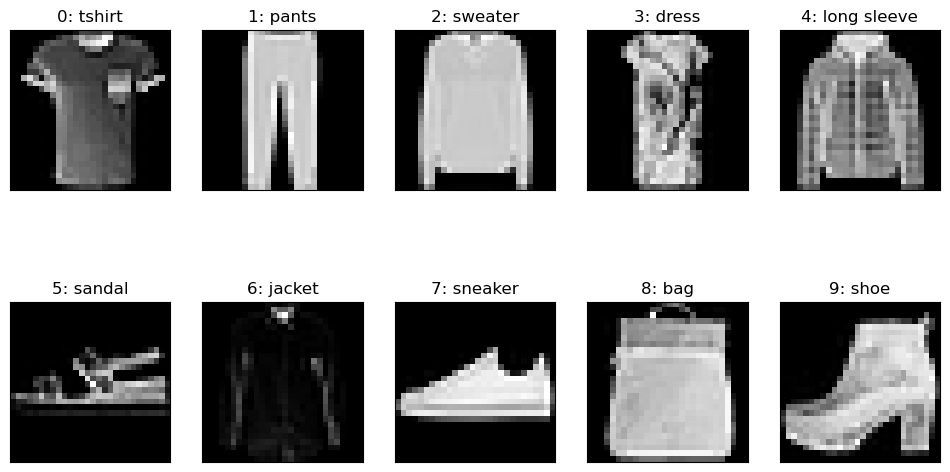

In [13]:
visualize_images(X_train,Y_train,label_dict)

We now have a look at the distribution of the different class labels in the training set by counting and visualizing how many occurences each label has.

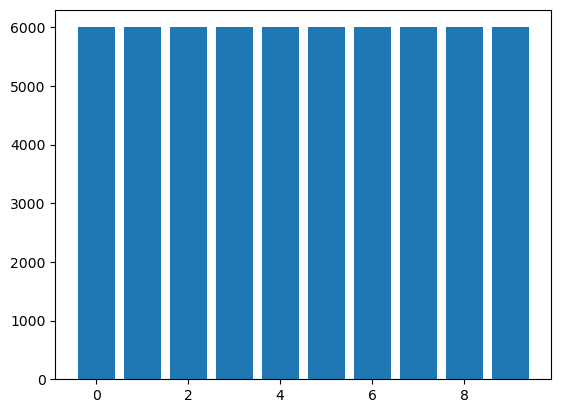

In [14]:
labels_train, counts_train = np.unique(Y_train, return_counts=True)
plt.bar(labels_train, counts_train)
plt.show()

We recall the size and shape of the images.

In [15]:
print(X_train.shape[1:])

(28, 28)


Because our data are images they are stored in 3D arrays, there are many ways to approach machine learning problems on images, and we will use a basic one here. We will use the classification methods that we learned, which do not take the spatial 2D structure of the image into account, so we need to reshape the data to transform the (28 x 28) pixels into 784 predictor variables.  Thus, we will think of each image as a string of pixel values with no spatial relation, allowing us to flatten it into a vector of length width*height. 

We can flatten our entire 2D array into a 3D array using the reshape method.

In [16]:
im_dims = X_train.shape[1:]

X_train_flat = # use reshape to flatten 3D array to 2D array (training data)
X_test_flat = # use reshape to flatten 3D array to 2D array (t data)

SyntaxError: invalid syntax (2925362234.py, line 3)

In order to find the "best" classification model for our purpose, we will split the training set further into a (smaller) training set and a validation set. The value of "test_size" here corresponds to the fraction of samples that will go into the validation set.

In [18]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV

x_train, x_val, y_train, y_val = train_test_split(X_train_flat, Y_train, test_size=0.1)

NameError: name 'X_train_flat' is not defined

Our training data has a certain distribution of labels (if it was sampled well) which models the natural distribution of whatever data we expect to find in the wild. This doesn't neccesarily mean that this distribution is uniform, but we should keep this in mind whenever we sample our data as it plays a big role in how our models generalize.

In general, models tend to work better on more abundant labels. This may or may not be desirable, and one should look into ways to deal with class imbalance for their specific case.

Let's say we are using the MNIST digit dataset. The train_test_split() function provided us with a random sampling of evaluation data and training data, but suppose we were really unlucky and our training data consisted of only 2s and 3s, while our evaluation data was all 8s and 9s. In this case our models would be pretty good at recognizing 2s and 3s, but wouldn't score very well on the evaluation data.

Of course this is unlikely to happen for us, but in many cases of great class imbalance train_test_split may miss or underrepresent classes. Let's check to see if our train labels y_train and our evaluation labels y_val have the same distribution, by visualizing the label counts for the two subsets of samples.

In [ ]:
# bar graph labels distribution for train
labels_train, counts_train = np.unique(y_train, return_counts=True)
plt.bar(labels_train, counts_train)
plt.show()

# bar graph labels distribution for val
labels_val, counts_val = np.unique(y_val, return_counts=True)
plt.bar(labels_val, counts_val)
plt.show()

# ratio of class labels in train and in val
(counts_val/counts_val.sum()) / (counts_train/counts_train.sum())

We observe that the distribution of samples in the different label classes is not balanced anymore (even though it is not too imbalanced). In order to avoid any imbalance, one case use the optional parameter `stratify` and set it to equate the label vector, see also the documentation of [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split). 

In [17]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3, stratify=Y_train)

# distribution of stratified y_train
labels_train, counts_train = np.unique(y_train, return_counts=True)
plt.bar(labels_train, counts_train)
plt.show()

# distribution of stratified y_val
labels_val, counts_val = np.unique(y_val, return_counts=True)
plt.bar(labels_val, counts_val)
plt.show()

# ratio of class labels in train/val very close to 1
(counts_val/counts_val.sum()) / (counts_train/counts_train.sum())

NameError: name 'train_test_split' is not defined

Ideally, we should work with the image data using the full available resolution.
However, it might be computationally demanding to work with the full 28x28 pixel images for small exercise today. For that reason, we "subsample" the images by deleting the pixels in every other row and column.

In [ ]:
X_train_orig = X_train_flat
Y_train_orig = Y_train
X_test_orig = X_test_flat
Y_test_orig = Y_test

In [ ]:
# delete every other row and column of images
X_train_tmp = X_train_orig[:, np.vstack([2*i*28 + np.arange(0,28) for i in range(0, 14)]).ravel()]
X_train1414_ = X_train_tmp[:, [2*i for i in range(X_train_tmp.shape[-1]//2)]]

X_test_tmp = X_test_orig[:, np.vstack([2*i*28 + np.arange(0,28) for i in range(0, 14)]).ravel()]
X_test1414_ = X_test_tmp[:, [2*i for i in range(X_test_tmp.shape[-1]//2)]]

Ideally, we would work with all 60000 samples in the training set, for example. For computational reasons, however, we also restrict ourselves only to a subset of 12000 random samples of these (and similarly, for the test set).

This kind of downsampling may be useful while you experiment, but of course you should make sure your results generalize to your real dataset if you are working on a "real" problem.

In [ ]:
# throw away 80% of our data
X_train1414, _, Y_train_subsampled, _ = train_test_split(X_train1414_, Y_train, train_size=0.2, stratify=Y_train, random_state=0)
X_test1414, _, Y_test_subsampled, _ = train_test_split(X_test1414_, Y_test, train_size=0.2, stratify=Y_test, random_state=0)

In [ ]:
Y_train_subsampled.shape

In [ ]:
X_train1414.shape

In [ ]:
visualize_images(X_train1414,Y_train_subsampled,label_dict)

## Classification of Fashion MNIST: Using Logistic Regression
Now, we have obtained an intuition about the dataset and processed it so that we can feed it into some of the classification methods we learned about. 

We start with logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

We split the processed dataset into a training set and validation set. The split is, as above, done in a stratified manner which means that the class label frequencies remain balanced in both sets.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_train1414, Y_train_subsampled, test_size=0.3, stratify=Y_train_subsampled)

In [ ]:
#print the dimensions to x_train to find the size of the training set and number of predictive variables
print(...)

**Discuss the following questions with your group members:**
1. How many parameters are there in our logistic regression model?
2. Is the size of the training set appropriate compared to the number of parameters to fit a predictive model? If you are not sure, consider the more concrete situation of doing a least squares regression to fit a single-variable polynomial to a training set of 2-dimensional points. 

Due to defaults in sklearn.linear_model.LogisticRegression, we would need to pass the parameter in `penalty='none'` and  `multi_class='multinomial'` to get the version described in class.

However, for computational reasons which have to do with the lack of strong convexity of the the logistic regression loss, it is common to use logistic regression with an $\ell_2$-regularization term. This corresponds to the default in `scikit-learn`, which is `penalty=l2'. We choose the default regularization parameter $C=1$. If desired, this parameter can later be tuned via cross validation. 

In [19]:
lr = LogisticRegression(penalty='l2',C=1,multi_class='multinomial',max_iter=1000)
lr.fit(x_train, y_train)
y_train_lr_pred = lr.predict(x_train)
y_val_lr_pred = lr.predict(x_val)

NameError: name 'LogisticRegression' is not defined

If you see a warning here, this is an encounter with the realities and limitations of optimization in the context even of simple statistical models such as logistic regression. You can increase the maximal number of iterations and see if it significantly changes something in the resulting accuracies.

There are many metrics one can use on a classification problem, indeed in the real world you'll often find that choosing the correct metric is THE problem itself. For now we will stick to accuracy, which corresponds to the quotient between correctly labeled samples and all samples.

Why might you want a different metric? Suppose you have a binary classification problem with 90% of your labels 0 and 10% 1. A model which always predicts 0 will have a great score of 90%! In this case you might chose a different metric which takes this imbalance into account, for example the f1 score. Worse yet, maybe a 0 is "all normal" and 1 is "catastrophic failure", then you better be sure you get those 1 predictions correct...

In [ ]:
from sklearn.metrics import accuracy_score
acc_train_lr = accuracy_score(y_train, y_train_lr_pred)
acc_val_lr = accuracy_score(y_val, y_val_lr_pred)

print("Logistic Regression: Training Accuracy: {:.4f}, Validation Accuracy: {:.4f}".format(acc_train_lr, acc_val_lr))

You should find that the training accuracy is higher than the accuracy on the validation set.

The discrepency between these two scores is important to keep in mind. A much higher training score could imply overfitting of your model to the training data, suggesting a form of regularization. A much higher validation accuracy score might make you rethink if your validation and training dataset were sampled well.

## The Confusion Matrix

If fitting models was the easy part of data science, one of the hardest parts is figuring out why models are giving you certain results. If your model didn't give you 100% accuracy then it is making mistakes. Are these mistakes random? Is there a pattern to them? Does the model make the same mistake every time?

For example, in the [MNIST digit dataset](https://en.wikipedia.org/wiki/MNIST_database) you might find that logistic regression mixes up 3s and 8s a lot, or 1s and 7s. This is pretty reasonable since handwritten versions of these digits look similar. Is there anything you can do about this? Should you be worried?

We can use the so-called _confusion matrix_ (see [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix)) to see exactly how our predictions are going wrong.

In [ ]:
from sklearn.metrics import confusion_matrix, make_scorer, ConfusionMatrixDisplay
#confusion_frame = pd.DataFrame(confusion_matrix(y_val, y_val_lr_pred), index=label_dict.values(), columns=label_dict.values())
confusionmatrix = confusion_matrix(y_val, y_val_lr_pred)
disp = ConfusionMatrixDisplay(confusionmatrix,display_labels=label_array)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

## Exercise Part: K-Nearest Neighbor Classifier & Model Selection

Now, it is your turn!
Let's run a different classification algorithm, the K Nearest Neighbors classifier. Feel free to choose how many neighbors you want to consider.

### (a) K-Nearest Neighbor for fixed k.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# integer parameter for how many neighbors to use
n_neighbors = 

# instantiate KNeighborsClassifier with n_neighbors
# and fit to data
knn = 

# use the model.predict() method to make predictions on train and val data
y_train_pred = 
y_val_pred = 

# compute accuracies of train and val using accuracy_score)
acc_train = 
acc_val = 

# print results in nice format
print("KNN {}: Train Accuracy: {:.4f}, Test Accuracy: {:.4f}".format(n_neighbors, acc_train, acc_val))

Discuss the following questions with your group members:
1. Calculate the Train and Test accuracy for n_neighbors = 1, 5, 1000, 2000. What do you notice about the accuracies in these cases?
2. The KNN algorithm has approximately N/K effective parameters, where N is the size of the training set and K is the number of nearest neighbors (i.e. the n_neighbors variable). Given this effective number of parameters, do your results from question 1 make sense? 

Depending on which dataset you used you might find that k-Nearest Neighbors does about the same as Logistic Regression or much better.

When one algorithm does significantly better than another it is worth thinking about why that algorithm should be better on your data. For example perhaps you are using image data and one algorithm takes into account the spatial properties of the image (this doesn't apply to us in the current state because we flattened our images).

In the case that two models do about the same it becomes more complicated to decide which is better. There is some noise in our evaluation accuracy depending on which portion of the data was randomly assigned to x_val. 

The most common way to deal with this is through [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)), and the most popular form of cross validation is [K-fold cross validation](https://scikit-learn.org/stable/modules/cross_validation.html). In K-fold cross validation, the data is separated into k chunks. For each of these chunks a model is trained on the other k-1 chunks and evaluated on the held out chunk. Because each data point is assigned to only one chunk it has a unique evaluation score, and these scores are used to determine the effectiveness of the model.

Scikit-learn offers both normal and Stratified version of [K-fold cross validation (documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold). It is really easy to write your own version of cross validation, and in many cases your data will require a non trivial form of validation that will require you to do this.

### (b) Cross Validation of logistic regression

Let's use 5-fold cross validation on our logistic regression model via scikit-learn's K-fold object. The goal of this is to see whether the performance of the logistic regression model is consistent with respect to being trained on different subsets of the data. 

In [ ]:
# we use this to suppress any warning that might occur during the training of the logistic regression models
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# create a KFold cross validation object with, say, 5 folds
cv =

# note when we use cross validation we
# pass in the whole X_train1414 instead of using the manually made split into
# into x_train, x_val from above!

# complete the loop below to train a logistic regression classifier
# and make predictions on each held out fold
for train_index, val_index in cv.split(X_train1414, Y_train_subsampled):
    x_train, x_val = X_train1414[train_index], X_train1414[val_index]
    y_train, y_val = Y_train_subsampled[train_index], Y_train_subsampled[val_index]

    # instantiate and fit a LogisticRegression object
    # with multi_class='multinomial' and penalty='none'
    # fit it on the training folds x_train
    lr = 
    
    # make predictions on the infold training data x_train
    # and out of fold texting data x_val
    y_train_lr_pred = 
    y_val_lr_pred = 

    acc_train_lr = 
    acc_val_lr = 

    print("Logistic Regression: Train Accuracy: {:.4f}, Test Accuracy: {:.4f}".format(acc_train_lr, acc_val_lr))


### (c) Cross Validation of k-nearest neighbors classifier

Before we cross validate our KNeighborsClassifier, note that above, we arbitrarily set 'n_neighbors=5'. Was this a good choice? We should try various values of this parameter to see what the optimal value is i.e the one that achieves the highest cross validation score. By hand this could be done in a nested loop, with the outer loop running through choices of n_neighbors and the inner loop through folds.

Luckily for us scikit-learn packages this up into the super useful [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) object. GridSearchCV takes an estimator, a cross validation strategy, and a dictionary of parameters and finds the best parameters for the estimator. Unlike cross_validate, GridSearchCV acts as an estimator itself with fit and predict methods, so you dont need to retrain a new estimator with the optimal parameters. What a bargain!

In [ ]:
# create the KNeighborsClassifier object, the cv object, and the parameter dictionary
# I would reccomend using n_folds=3 and optimizing over n_neighbors=3,5,10
# for speed reasons
knn = 
cv = 
params =  # this should be a dictionary {"param_name" : [param, options, ...]}

gcv = 

Fitting the GridSearchCV estimator might take a minute...

In [ ]:
%time

The GridSearchCV object holds a dictionary cv_results_ with full results from the fitting which you should look at carefully for consistency

In [ ]:
# print and examine the variable cv_results_ in the class object of GridSearchCV from above


best_estimator_ holds the information for the optimal configuration of parameters found by the gridsearch.

In [ ]:
# print the best_estimator_ to see which n_neighbors did the best


Now that we have a good idea of where Logistic Regression and K Nearest Neighbors stand, let's train them on the entire training data (the 14x14 pixel one, but you can also later try the full 28x28 pixel data!) and evaluate them on the held out, never looked at testing data.

K-Nearest Neighbors has already been trained via GridSearchCV, so we only need to train logistic regression.

In [ ]:
# one more time: Create a LogisticRegression object with the usual parameters
# and fit it on the entire X_train1414, Y_train_subsampled

# make predictions from the GridsearchCV object and LogisticRegression object
# on the held out X_test1414 testing set
y_pred_knn = 
y_pred_lr = 

Let's take a look at the labels assigned by k-nearest neighbors and logistic regression on some of our images. Do you see any disagreements? You can run the cell below multiple times to produce different images.

In [ ]:
n_row = 3
n_col = 5

shuff = np.random.permutation(len(Y_test_subsampled))

fig, axs = plt.subplots(n_row, n_col, figsize=fsize)
for i, ax in zip(shuff, axs.ravel()):
    ax.set_title('True label: \n %s\n Prediction by KNN: \n %s \n Prediction by LR: \n %s' % \
               (label_array[Y_test_subsampled[i]], label_array[y_pred_knn[i]], label_array[y_pred_lr[i]]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(X_test1414[i].reshape(14,14), 
            cmap='gray' )

for ax in axs.ravel()[len(label_dict):]:
    ax.set_visible(False)
plt.show()

We compute the scores on the never seen testing data set. You should hopefully see some consistency with your cross validation results. If not you need to think about what could cause a discrepancy. Maybe the characterstics of the testing data has changes since you collected the training data. Perhaps people stopped wearing pants and so these are missing from the testing data?

In general the test scores should not surprise you at this point.

In [ ]:
# compute the knn and lr scored using accuracy_score
knn_acc = 
lr_acc = 

# print the accuracy scores
print("KNN acc: {:.4f}, lr acc: {:.4f}".format(knn_acc, lr_acc))

There is more than one way to reach a certain accuracy score. Perhaps regardless of their overall performance one of these models was better than the other at a particular digit or a particular article of clothing. We can check the correlation of the results to see how similar these models are.

In [ ]:
(y_pred_knn == y_pred_lr).mean()

For a more in depth look we can form a confusion matrix between the K Nearest Neighbors predictions and the Logistic Regression predictions. Where there specific items that they tended to disagree on? In these cases who was correct?

In [ ]:
# create a confusion_matrix between y_pred_knn and y_pred_lr. You can see further above how this was done in a similar case.
# Note that sklearn.metrics.confusion_matrix consider the first argument as the "true label" data and the second
# argument as "predicted label". However, in this case we are just comparing the labels predicted by KNN and LR, respectively!


### (d) BONUS Problem

If we have two or more estimators that are fairly uncorrelated we can leverage their different strengths in a new model via a precedure known as stacking.

The idea goes like this. Model A and Model B are both looking at pictures of clothes and making predictions. They recieve an image which Model A confidently identifies as pants. Model B thinks that the image is of a dress, but is less sure. Model C recieves these results from Models A and B and knows from experience that Model A is an expert on things that look more like pants. Model C gives us our final prediction "pants".

Stacking can be thought of as a form of feature engineering or nonlinear transformation, which we haven't used so far in this notebook. From the original features (pixel values) we generate new features which are the outputs of our models. We then train a new model on these outputs to give us our overall prediction. 

Many models such as Random Forests and Neural Networks can be thought of as kinds of stacked models. Indeed you can even stack stacked models! In practice the best performance on machine learning problems tends to come from large ensembles of stacked models.

How to train and evaluate stacked models is a complex task that is very prone to overfitting. I would highly recommend reading into various strategies, particularly from the Kaggle competition community (these peope love stacking), before using this in your own work.

For now we illustrate the power of stacking using scikit-learn's [StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html?highlight=stackingclassifier#sklearn.ensemble.StackingClassifier). Using this object is quite simple, you need to pass in the base estimators, the meta estimator (Model C above), and a cross validation strategy. Under the hood StackingClassifier trains the base estimators on the entire training set, as well as performs out of fold class probability estimates using the cross validation strategy. The meta estimator is then trained on these held out probability estimates instead of the actual training set predictions to help avoid overfitting.

Once again, using and understanding are very different things. I recommend doing your own research. This section is vague on purpose.

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = 
final_estimator = 
cv = 

sc = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=cv)

StackingClassifier can be fit like any estimator in the scikit-learn API.

In [ ]:
sc.fit(X_train1414, Y_train_subsampled)

Likewise, we can use the predict method to get results from our stacked model on X_test.

In [ ]:
y_pred_stack = sc.predict(X_test1414)

You might find an improvement over the individual models. Isn't that cool! It might be worth digging through the models, which are stored in the StackingClassifier object, to get a better understanding of how this stacked model is working.

In [ ]:
stack_acc = accuracy_score(Y_test_subsampled, y_pred_stack)
print("KNN acc: {:.4f}, lr acc: {:.4f}, Stack acc: {:.4f}".format(knn_acc, lr_acc, stack_acc))

We have an overall increase in accuracy, but to get a better understanding of why the accuracy improved we can look at the individual categories using the the confusion matrices. 

In [ ]:
#make confusion matrix for the lr, knn, and stacked models
#recall: y_pred_lr, y_pred_knn, y_pred_stack are the predictions from the test data X_test1414

confusionmatrix_lr = confusion_matrix(Y_test_subsampled, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusionmatrix_lr,display_labels=label_array)

confusionmatrix_knn = confusion_matrix(Y_test_subsampled, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusionmatrix_knn,display_labels=label_array)

confusionmatrix_stack = confusion_matrix(Y_test_subsampled, y_pred_stack)
disp_stack = ConfusionMatrixDisplay(confusionmatrix_stack,display_labels=label_array)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
disp_lr.plot(ax=ax1)
disp_knn.plot(ax=ax2)
disp_stack.plot(ax=ax3)

plt.show()

To get a better idea of how our predictions have changed after stacking we can examine the accuracies for each category individually. 

Let $x$ be a data point in the test set and $\ell$ be a category label (tshirt, pants, etc.) Calculate the accuracies: 
$$\frac{\#\{x : x \text{ has label } \ell \text{ and } x \text{ predicted to have label } \ell\}}{\#\{x : x \text{ predicted to be } \ell\}}, \quad \text{ for each label } \ell,$$ as an array of length 10. (Hint: There is a straightforward way to compute the accuracy arrays from the confusion matrix.) Do this calculation for each model: logistic regression, KNN, and the stacked model. 

In [ ]:
# compute category-wise accuracies for each model 
lr_cw_acc =  #numpy array of accuracies for each category
knn_cw_acc = 
stack_cw_acc = 

#dataframes are easier on the eyes
acc_df = pd.DataFrame([lr_cw_acc,knn_cw_acc,stack_cw_acc], index = ['LR', 'KNN', 'LR+KNN'])
acc_df.rename(columns = label_dict, inplace = True)
acc_df.round(3)

Examine each category to see by how much the accuracies improved after stacking.